# Titanic Survival Rate Prediction
#### The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

#### Objective
##### In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Overview
1) Understand the shape fo the data (Histogram, box-plots etc)
2) Data Cleaning
3) Data Exploration
4) Feature Engineering
5) Data Processing for Model
6) Basic Model Building
7) Model Tuning
8) Ensemble Model Building
9) Results

In [44]:
## importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
print('Succesfully Imported')

Succesfully Imported


##### 1) Understand the shape of the data

In [45]:
# importing the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [46]:
# checking a first 5 table rows
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
train_data.shape

(891, 12)

In [48]:
## Understand the nature of the data .info(), describe()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
## before drilling inside that data we can just separate object and integer data type
num_cols = train_data.select_dtypes(include = ['int64', 'float64'])
cat_cols = train_data.select_dtypes(include=['object'])

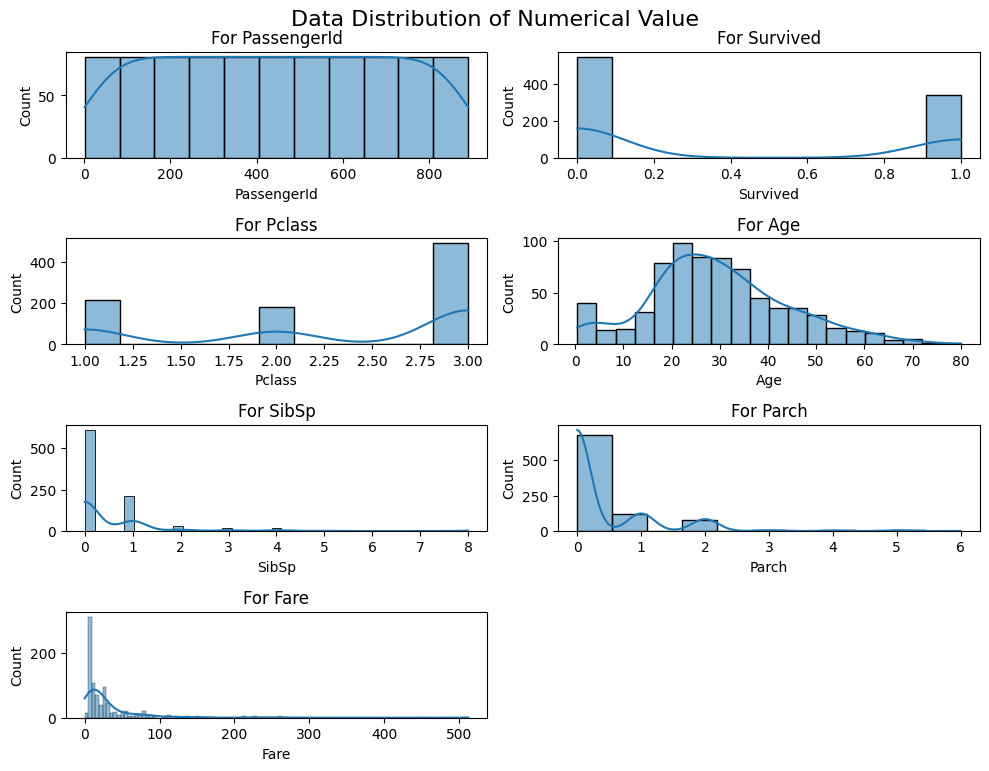

In [51]:
## Seeing the data distribution of numerical columns
total_cols = len(num_cols.columns)
plt.figure(figsize=(10,15))
plt.suptitle('Data Distribution of Numerical Value', fontsize=16)
for idx, num in enumerate(num_cols, 1):
    plt.subplot(8, 2, idx)
    sns.histplot(data=num_cols, x=num, kde=True)
    plt.title(f'For {num}')
plt.tight_layout()
plt.show()

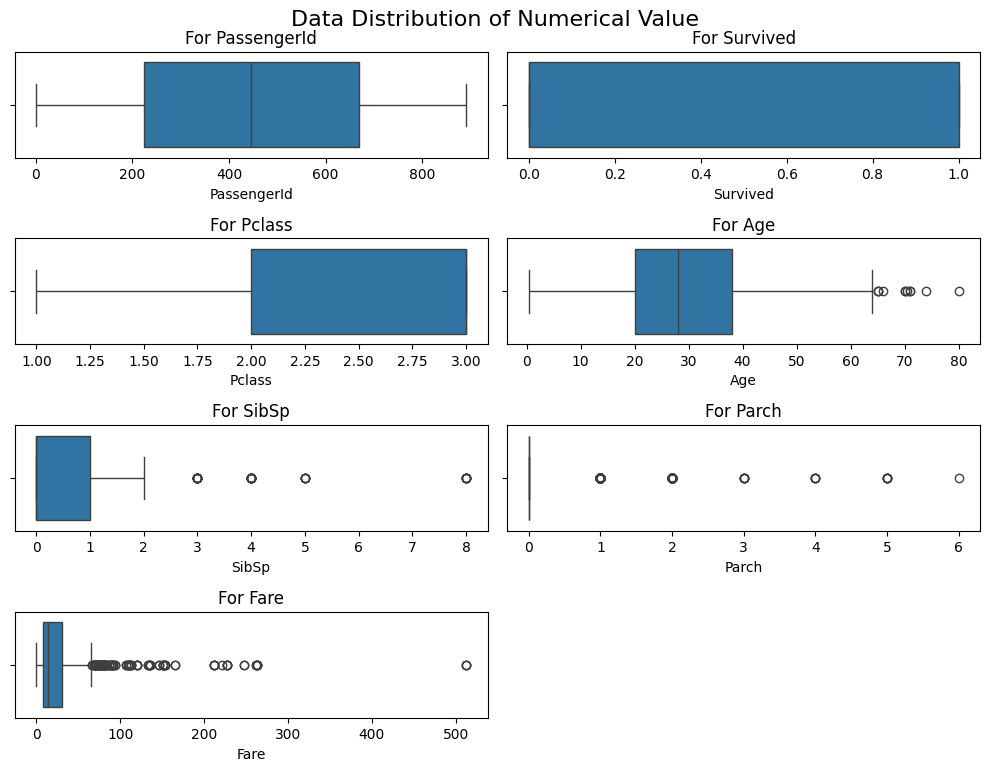

In [52]:
## Seeing the data distribution of numerical columns
total_cols = len(num_cols.columns)
plt.figure(figsize=(10,15))
plt.suptitle('Data Distribution of Numerical Value', fontsize=16)
for idx, num in enumerate(num_cols, 1):
    plt.subplot(8, 2, idx)
    sns.boxplot(data=num_cols, x=num)
    plt.title(f'For {num}')
plt.tight_layout()
plt.show()

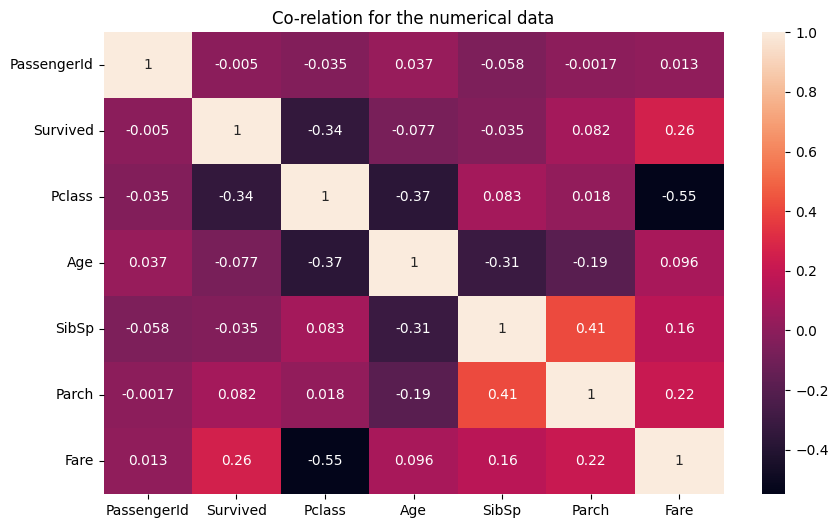

In [53]:
## let's have also see the co-relation between the numerical values
cor = num_cols.corr()
plt.figure(figsize=(10,6))
plt.title('Co-relation for the numerical data')
sns.heatmap(cor, annot=True)
plt.show()

##### We can see that there is not more of a correlation between the numerical columns, so we would not face multi-colinearity.

In [54]:
## comparing survival rate across Age, Pclass, SibSp, Parch, Fare
surv_rate = pd.pivot_table(train_data, index='Survived', values=['Age', 'Pclass', 'SibSp', 'Parch', 'Fare'])
surv_rate

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.626179,22.117887,0.329690,2.531876,0.553734
1,28.343690,48.395408,0.464912,1.950292,0.473684


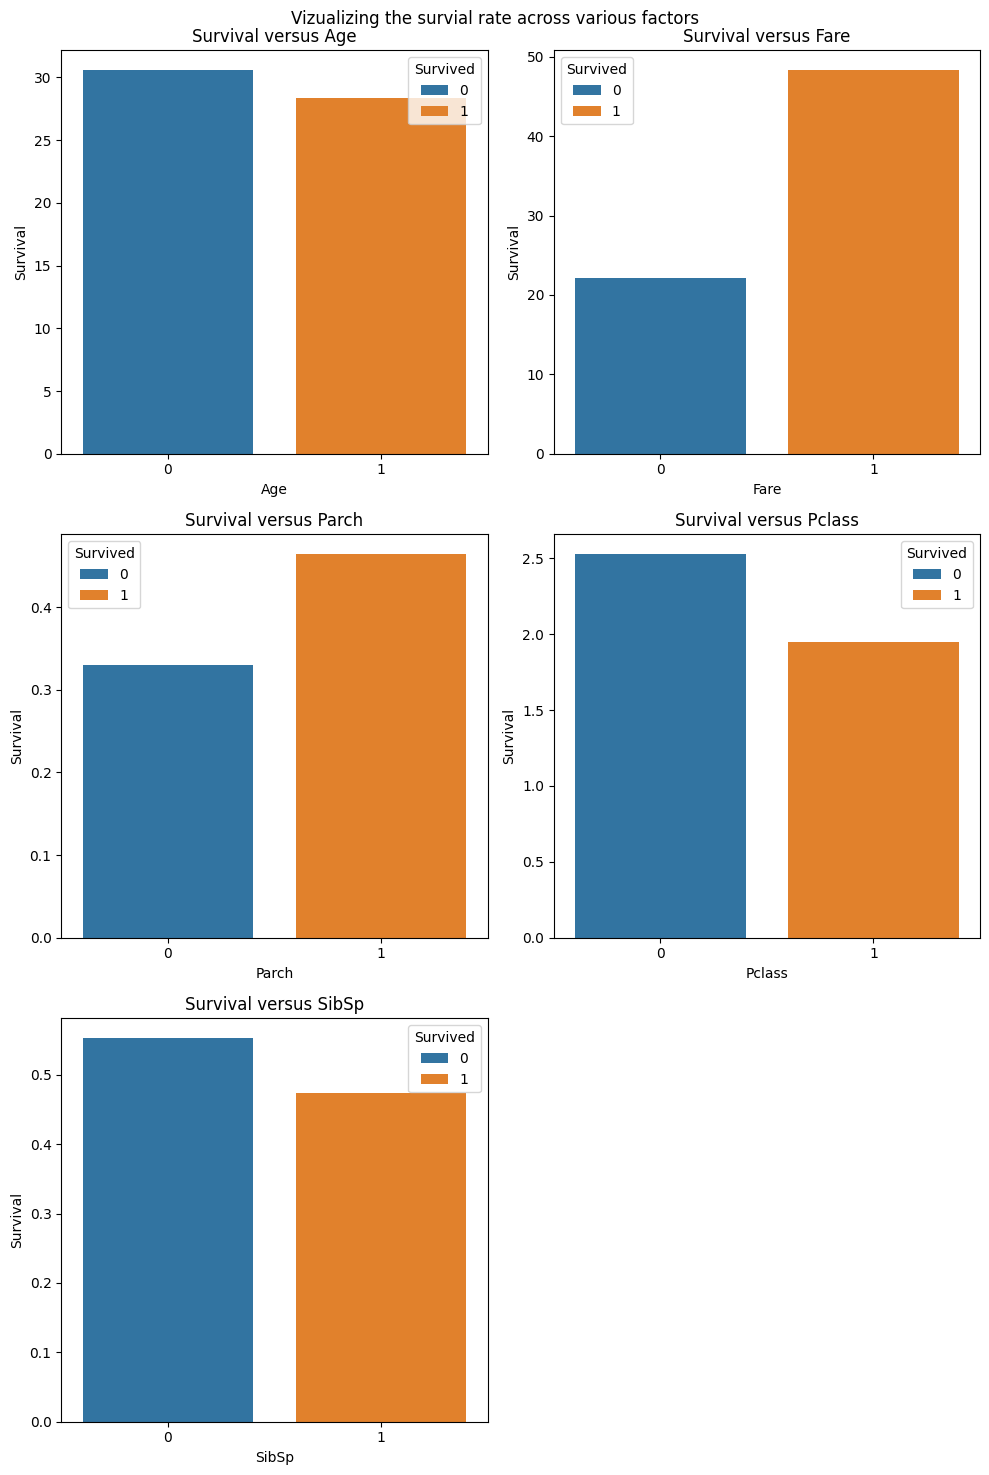

In [55]:
## Let's vizualize the survial rate across various values
plt.figure(figsize=(10,15))
plt.suptitle('Vizualizing the survial rate across various factors')
for idx, col in enumerate(surv_rate.columns, 1):
    plt.subplot(3, 2, idx)
    plt.title(f'Survival versus {col}')
    sns.barplot(data=surv_rate, x=surv_rate.index, y=surv_rate[col], hue='Survived')
    plt.xlabel(f'{col}')
    plt.ylabel('Survival')
plt.tight_layout()
plt.show()

In [56]:
cat_cols.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

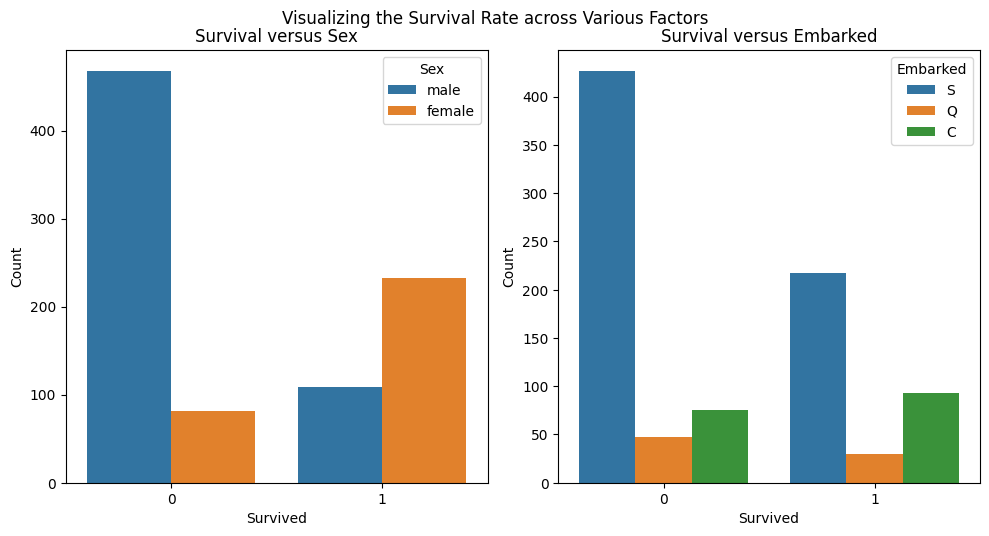

In [57]:
## Let's vizualize the survial rate across various values
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the columns to plot
new_cols = ['Sex', 'Embarked']  # 'Ticket' and 'Cabin' are not directly plottable due to unique values

plt.figure(figsize=(10, 15))
plt.suptitle('Visualizing the Survival Rate across Various Factors')

for idx, col in enumerate(new_cols, 1):
    plt.subplot(3, 2, idx)
    plt.title(f'Survival versus {col}')
    
    # Plot the count of each category for Survived and Not Survived
    sns.countplot(data=train_data, x='Survived', hue=col)
    
    plt.xlabel('Survived')
    plt.ylabel('Count')
    
plt.tight_layout()
plt.show()


## Feature Engineering

In [58]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [59]:
train_data.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [60]:
train_data['cabin_multiple'] = train_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train_data['cabin_multiple'].value_counts()

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [61]:
pd.pivot_table(data=train_data, columns='cabin_multiple', index='Survived', values='Ticket', aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [62]:
## create categories based on the cabin letter (n stands for null)
## in this case we will treat null values like it's own category
train_data['cabin_adv'] = train_data['Cabin'].apply(lambda x : str(x)[0])

In [63]:
## comparing survival rate by cabin
train_data.cabin_adv.value_counts()

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [64]:
pd.pivot_table(train_data, index='Survived', columns='cabin_adv', values='Name', aggfunc='count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [65]:
#understand ticket values better 
#numeric vs non numeric 
train_data['numeric_ticket'] = train_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train_data['ticket_letters'] = train_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [66]:
train_data['numeric_ticket'].value_counts()

numeric_ticket
1    661
0    230
Name: count, dtype: int64

In [67]:
## let's us view all rows in dataframe through scrolling.
pd.set_option('display.max_columns', None)
train_data['ticket_letters'].value_counts()

ticket_letters
0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: count, dtype: int64

In [68]:
## difference in numeric vs non-numeric tickets in survival rate
pd.pivot_table(train_data, index='Survived', columns='numeric_ticket', values='Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [69]:
## survival rate acroos different ticket types
pd.pivot_table(train_data, index='Survived', columns='ticket_letters', values='Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,pc,pp,ppp,sc,sca4,scah,scahbasle,scow,scparis,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,21.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,6.0,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,39.0,2.0,1.0,1.0,NaN,1.0,1.0,NaN,5.0,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [70]:
## feature engineering on person's title
train_data.Name.head(50)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [71]:
train_data['name_title'] = train_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [72]:
train_data.name_title.value_counts()

name_title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

## Data Pre-Processing for Model

In [73]:
train_data.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
cabin_multiple      0
cabin_adv           0
numeric_ticket      0
ticket_letters      0
name_title          0
dtype: int64

only 2 null values in 'Embarked' so, we can simply drop <br>
we drop the whole 'Cabin' column, as we have created another column on behalf on cabin <br>
for age we can calculate, mean or median and we can replace all the null values with mean or median.

In [74]:
train_data.dropna(subset=['Embarked'], inplace=True)

In [75]:
## droping 'Cabin', 'PassengerID', 'Name' and 'Ticket' column.
train_data.drop(columns=['Cabin', 'PassengerId', 'Name','Ticket'], inplace=True)

In [76]:
mean_age = np.mean(train_data['Age'])
train_data['Age'] = train_data['Age'].fillna(mean_age)

In [77]:
train_data.isnull().sum()

Survived          0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
Embarked          0
cabin_multiple    0
cabin_adv         0
numeric_ticket    0
ticket_letters    0
name_title        0
dtype: int64

In [78]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,name_title
0,0,3,male,22.0,1,0,7.2500,S,0,n,0,a5,Mr
1,1,1,female,38.0,1,0,71.2833,C,1,C,0,pc,Mrs
2,1,3,female,26.0,0,0,7.9250,S,0,n,0,stono2,Miss
3,1,1,female,35.0,1,0,53.1000,S,1,C,1,0,Mrs
4,0,3,male,35.0,0,0,8.0500,S,0,n,1,0,Mr


In [79]:
# Ensure `cat_cols` is a list of column names
cat_cols = ['Sex', 'Embarked', 'cabin_adv', 'ticket_letters', 'name_title']

# Apply one-hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=cat_cols, drop_first=True)

# Display the transformed dataset
train_data_encoded.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,cabin_multiple,numeric_ticket,Sex_male,Embarked_Q,Embarked_S,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n,ticket_letters_a4,ticket_letters_a5,ticket_letters_as,ticket_letters_c,ticket_letters_ca,ticket_letters_casoton,ticket_letters_fa,ticket_letters_fc,ticket_letters_fcc,ticket_letters_pc,ticket_letters_pp,ticket_letters_ppp,ticket_letters_sc,ticket_letters_sca4,ticket_letters_scah,ticket_letters_scahbasle,ticket_letters_scow,ticket_letters_scparis,ticket_letters_soc,ticket_letters_sop,ticket_letters_sopp,ticket_letters_sotono2,ticket_letters_sotonoq,ticket_letters_sp,ticket_letters_stono2,ticket_letters_swpp,ticket_letters_wc,ticket_letters_wep,name_title_Col,name_title_Don,name_title_Dr,name_title_Jonkheer,name_title_Lady,name_title_Major,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,0,3,22.0,1,0,7.2500,0,0,True,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,1,1,38.0,1,0,71.2833,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,1,3,26.0,0,0,7.9250,0,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,1,1,35.0,1,0,53.1000,1,1,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,0,3,35.0,0,0,8.0500,0,1,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [80]:
for col in train_data_encoded.select_dtypes(include=['bool']).columns:
    train_data_encoded[col] = train_data_encoded[col].astype('int64')

In [81]:
train_data_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,cabin_multiple,numeric_ticket,Sex_male,Embarked_Q,Embarked_S,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n,ticket_letters_a4,ticket_letters_a5,ticket_letters_as,ticket_letters_c,ticket_letters_ca,ticket_letters_casoton,ticket_letters_fa,ticket_letters_fc,ticket_letters_fcc,ticket_letters_pc,ticket_letters_pp,ticket_letters_ppp,ticket_letters_sc,ticket_letters_sca4,ticket_letters_scah,ticket_letters_scahbasle,ticket_letters_scow,ticket_letters_scparis,ticket_letters_soc,ticket_letters_sop,ticket_letters_sopp,ticket_letters_sotono2,ticket_letters_sotonoq,ticket_letters_sp,ticket_letters_stono2,ticket_letters_swpp,ticket_letters_wc,ticket_letters_wep,name_title_Col,name_title_Don,name_title_Dr,name_title_Jonkheer,name_title_Lady,name_title_Major,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,0,3,22.0,1,0,7.2500,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,3,35.0,0,0,8.0500,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [82]:
train_data_encoded.to_csv('cleaned_train_data.csv')
print('coverted')

coverted
